# Automated Bias Triangle Shape Matching & Feature Extraction

Following the detection & feature extraction (including the identification of Pauli Spin Blockade) for bias triangles, we consider re-identification of the original amid the occurrence of split triangles as a result of pulsing. Subsequently, we re-identify the base & detuning axis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv

In [2]:
root_dir = ''
d1 = np.load(os.path.join(root_dir,"split_triangle_lockin.npy"), allow_pickle=True)

d2 = np.load(os.path.join(root_dir,"split_triangle.npy"), allow_pickle=True)

d3 = np.load(os.path.join(root_dir,"single_triangle.npy"), allow_pickle=True)

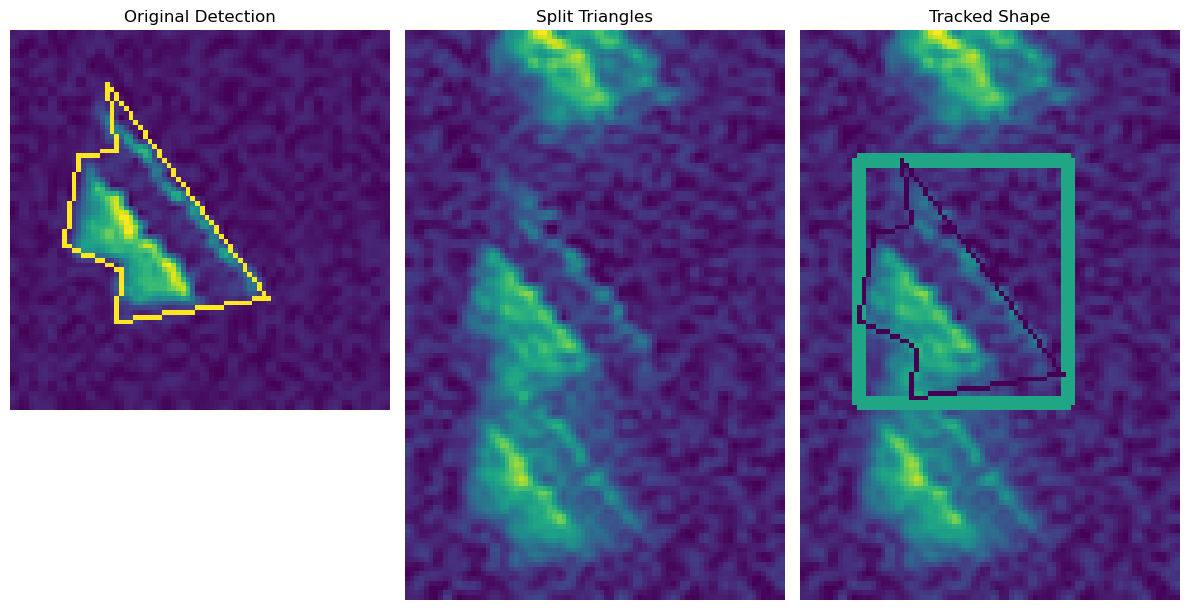

In [3]:
import btriangle_detection

gray_orig, ims, masks = btriangle_detection.triangle_segmentation_alg(d3,res = 2,min_area = 3, thr_method = 'noisy_binary',inv=True)
gray_orig2, _, _ = btriangle_detection.triangle_segmentation_alg(d2,res = 2,min_area = 3, thr_method = 'noisy_binary',inv=True)

im, _,_ , new_contour = btriangle_detection.triangle_shape_matching(gray_orig, gray_orig2, masks)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12),sharex=True, sharey=True)

ax[0].imshow(ims[0]) 
ax[0].axis('off') 
ax[0].set_title('Original Detection') 

ax[1].imshow(gray_orig2) 
ax[1].axis('off') 
ax[1].set_title('Split Triangles') 

ax[2].imshow(im) 
ax[2].axis('off') 
ax[2].set_title('Tracked Shape') 

fig.tight_layout()
plt.show() 

We proceed to determine the base & detuning axis of the re-identified bias triangle pair.

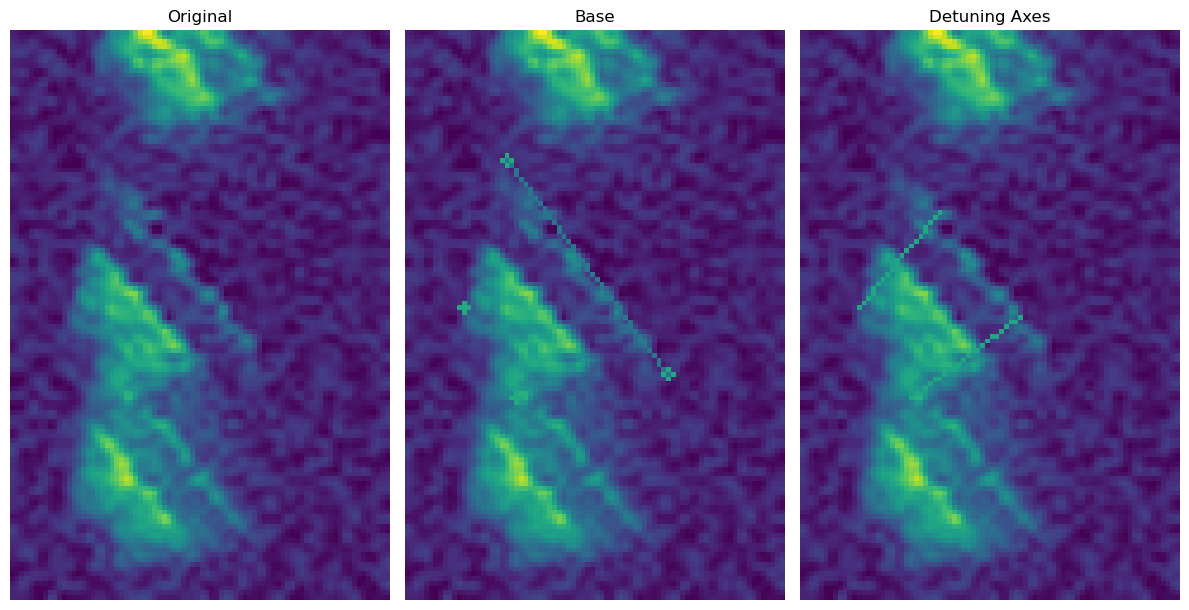

In [5]:
import btriangle_properties


mask_new = np.zeros(gray_orig2.shape, np.uint8)
cv.drawContours(mask_new, [new_contour], -1, (255, 255, 255), -1)

base, corner_pts, c_im = btriangle_properties.detect_base(gray_orig2, mask_new, 'down')
axes_points,axes,line_img = btriangle_properties.detect_detuning_axis(gray_orig2, base, corner_pts)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12),sharex=True, sharey=True)

ax[0].imshow(gray_orig2) 
ax[0].axis('off') 
ax[0].set_title('Original') 

ax[1].imshow(c_im) 
ax[1].axis('off') 
ax[1].set_title('Base') 

ax[2].imshow(line_img) 
ax[2].axis('off') 
ax[2].set_title('Detuning Axes') 
fig.tight_layout()
plt.show() 